#Simple Linear Regression Modeling

A partir del dataset de la imobiliaria de taiwan que muestra:distancia al metro, número de sumpermercados cercanos, antiguedad de la casa, y su precio final.
Vamos a intentar predecir como influyen los diferentes campos al precio. En nuestro caso de momento nos centraremos en el número de supermercados



In [1]:
import pandas as pd
dataset = pd.read_csv('taiwan_real_estate2.csv')

dataset.groupby('n_convenience').describe()


dist_to_mrt_m                                                    \
                      count         mean          std        min          25%   
n_convenience                                                                   
0                      67.0  2439.544778  1601.321821  185.42960  1002.495200   
1                      46.0  1734.222433  1908.177170  169.98030   342.134550   
2                      24.0  1357.597871   554.221852  552.43710   747.031825   
3                      46.0  1709.951009   643.040197  472.17450  1447.895000   
4                      31.0  1004.432926   660.409364  156.24420   533.476200   
5                      67.0   383.021352   161.616906  104.81010   289.324800   
6                      37.0   306.064235   113.810420  124.99120   197.133800   
7                      31.0   283.331406   185.564840   23.38284   157.605200   
8                      30.0   325.264727   171.249905   49.66105   181.969875   
9                      25.0   206.761702   128.195614   90.45606    90.456060   
10                     10.0   243.036197   154.826014   82.88643    92.963040   

                                                 price_twd_msq             \
                      50%         75%        max         count       mean   
n_convenience                                                               
0              2408.99300  4077.07700  4605.7490          67.0   8.006864   
1              1360.13900  1790.75950  6488.0210          46.0   9.633625   
2              1712.63200  1768.72450  1978.6710          24.0   9.504539   
3              2089.90850  2175.84375  2707.3920          46.0   8.937052   
4               815.93140  1154.63700  2469.6450          31.0  11.338636   
5               390.56840   492.23130  1013.3410          67.0  13.533994   
6               292.99780   376.17090   577.9615          37.0  14.206158   
7               250.63100   387.12505   769.4034          31.0  13.267288   
8               349.11085   479.52495   616.5735          30.0  13.523954   
9               161.94200   333.36790   463.9623          25.0  15.652648   
10              247.78255   379.55750   431.1114          10.0  14.653555   

                                                                                
                    std        min        25%        50%        75%        max  
n_convenience                                                                   
0              3.641078   3.509834   5.279879   6.747352  11.331316  16.732224  
1              4.932651   3.388805   7.481089   8.683812  11.308623  35.552194  
2              2.324892   6.323752   7.745840   9.273828  11.104387  15.279879  
3              2.482051   5.355522   7.148260   8.547655   9.682300  18.608169  
4              2.725734   6.596067   9.788200  11.316188  12.193646  19.031770  
5              2.630082   6.898638  11.906203  13.464448  15.658094  18.366112  
6              3.916307   2.299546  12.284418  13.827534  15.431165  22.269289  
7              2.413667   7.564297  12.223903  12.708018  14.614221  18.789713  
8              2.712966   8.018154  11.966717  12.934947  14.576399  20.484115  
9              3.542081   9.803328  12.768533  15.370651  17.579425  23.691377  
10             1.914167  11.467474  13.986384  14.387292  14.969743  18.729198

In [2]:
dataset.corr()

,dist_to_mrt_m,n_convenience,price_twd_msq
dist_to_mrt_m,1.000000,-0.602519,-0.673613
n_convenience,-0.602519,1.000000,0.571005
price_twd_msq,-0.673613,0.571005,1.000000




*   Muestra ScatterPlot de Precio vs n_convenience
*   Muestra Regplot de Precio vs n_convenience
*   Realitza el modelo y obtén los parámetros y escribe su función de regresión
*   Mediante la función predict del modelo Predice el precio para el rango de 1 a 10 supermercados.
* Compara Gráficamente con los valores reales
* Predice el precio para una casa cercana a 12 supermercados
* Predice el precio para una casa cercana a -1 y 2.5 supermercado. ¿Qué está pasando?





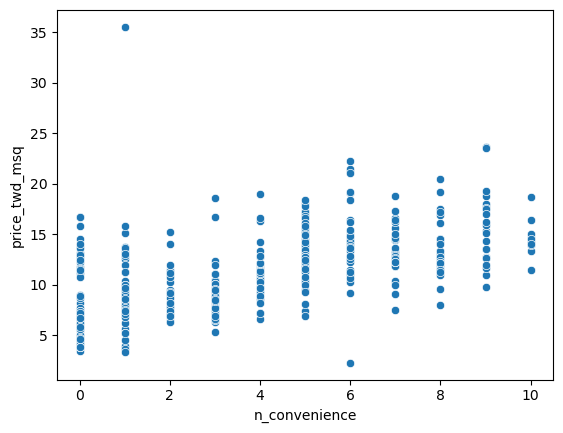

In [3]:
#Muestra ScatterPlot de Precio vs n_convenience
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='n_convenience', y='price_twd_msq',ci=None, data=dataset)
plt.show()

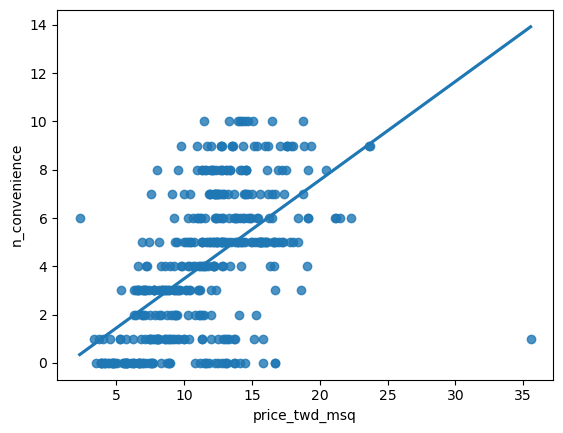

In [4]:
#Muestra Regplot de Precio vs n_convenience

sns.regplot(x='price_twd_msq', y='n_convenience',ci=None, data=dataset)
plt.show()

In [5]:
#Realitza el modelo y obtén los parámetros y escribe su función de regresión
from statsmodels.formula.api import ols

# calculamos el modelo 

mdl_price_vs_convenience = ols('price_twd_msq~n_convenience',data=dataset).fit()

# ver parametros
print(mdl_price_vs_convenience.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [7]:
import numpy as np

data_explicativaRange = pd.DataFrame({"n_convenience":np.arange(1,10)})
print(mdl_price_vs_convenience.predict(data_explicativaRange))

0     9.022317
1     9.820397
2    10.618477
3    11.416556
4    12.214636
5    13.012716
6    13.810795
7    14.608875
8    15.406955
dtype: float64


In [8]:
#Mediante la función predict del modelo Predice el precio para el rango de 1 a 10 supermercados.
data_predicted = data_explicativaRange.assign(mass=mdl_price_vs_convenience.predict(data_explicativaRange))
data_predicted

,n_convenience,mass
0,1,9.022317
1,2,9.820397
2,3,10.618477
3,4,11.416556
4,5,12.214636
5,6,13.012716
6,7,13.810795
7,8,14.608875
8,9,15.406955


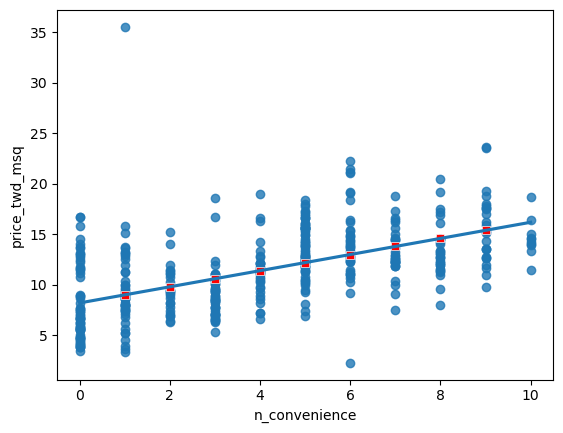

In [9]:
#Compara Gráficamente con los valores reales
fig = plt.figure()
sns.regplot(x='n_convenience', y='price_twd_msq',ci=None, data=dataset)
sns.scatterplot(x='n_convenience', y='mass', data=data_predicted,color='red',marker='s')

plt.show()


In [10]:
# Predice el precio para una casa cercana a 12 supermercados
data_cerca12 = pd.DataFrame({"n_convenience":[12]})
print(mdl_price_vs_convenience.predict(data_cerca12))


0    17.801194
dtype: float64


In [11]:
# Predice el precio para una casa cercana a -1 y 2.5 supermercado. ¿Qué está pasando?
data_RangeSuper = pd.DataFrame({"n_convenience":np.arange(-1,2.5)})
print(mdl_price_vs_convenience.predict(data_RangeSuper))

0    7.426158
1    8.224237
2    9.022317
3    9.820397
dtype: float64


## Transformaciones

Ahora vamos a visualizar la relación entre el precio y la distancia al metro:


*   Muestra gráficamente la relación entre precio-distáncia al metro. Sigue una relación lineal?
*   Transforma la distáncia en: sqrt_dist_metro_m y muéstra de nuevo la relación con el precio. Qué te parece ahora?
* Calcula la reg con la variable tranformada
* Muestra el resultado
* Compara gráficamente (Regplot y scatterPlot) en los dos casos e interpreta



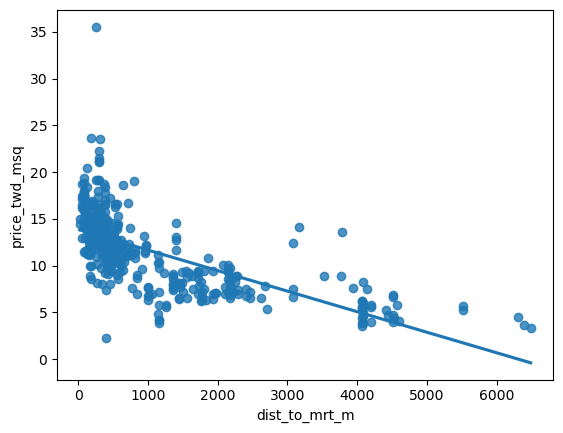

In [12]:
sns.regplot(x='dist_to_mrt_m', y='price_twd_msq',ci=None, data=dataset)
plt.show()

0       9.212970
1      17.509846
2      23.706212
3      23.706212
4      19.762803
         ...    
409    63.890649
410     9.510839
411    19.772951
412    10.237680
413     9.510839
Name: distanciaCuadrada, Length: 414, dtype: float64


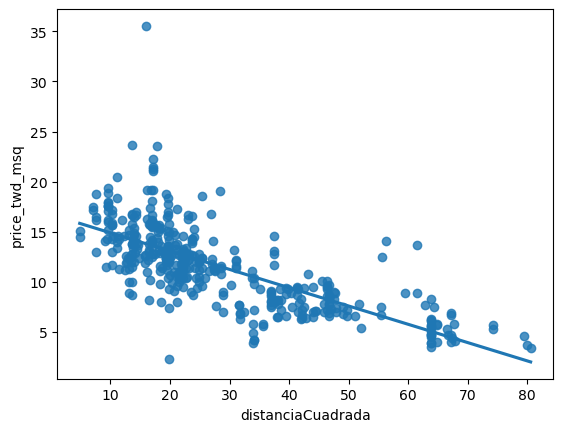

In [13]:
#Transforma la distáncia en: sqrt_dist_metro_m y muéstra de nuevo la relación con el precio. Qué te parece ahora?
df_precioMetro = dataset
df_precioMetro['distanciaCuadrada'] = np.sqrt(dataset['dist_to_mrt_m']) 
print(df_precioMetro['distanciaCuadrada'])

sns.regplot(x='distanciaCuadrada', y='price_twd_msq',ci=None, data=df_precioMetro)
plt.show()

In [14]:
#Calcula la reg con la variable tranformada

mdl_price_vs_Cuadrado = ols('price_twd_msq~distanciaCuadrada',data=df_precioMetro).fit()

# ver parametros
print(mdl_price_vs_Cuadrado.params)

Intercept            16.709799
distanciaCuadrada    -0.182843
dtype: float64


In [15]:
#Muestra el resultado
data_Range60000 = pd.DataFrame({"dist_to_mrt_m" : np.arange(0,6000,500),"distanciaCuadrada" : np.sqrt(np.arange(0,6000,500))})
res = mdl_price_vs_Cuadrado.predict(data_Range60000)
print(res)

0     16.709799
1     12.621308
2     10.927800
3      9.628325
4      8.532818
5      7.567656
6      6.695083
7      5.892670
8      5.145801
9      4.444327
10     3.780856
11     3.149810
dtype: float64


In [16]:
data_Range60000 = data_Range60000.assign(price_twd_msq = res)
data_Range60000.head()

,dist_to_mrt_m,distanciaCuadrada,price_twd_msq
0,0,0.000000,16.709799
1,500,22.360680,12.621308
2,1000,31.622777,10.927800
3,1500,38.729833,9.628325
4,2000,44.721360,8.532818


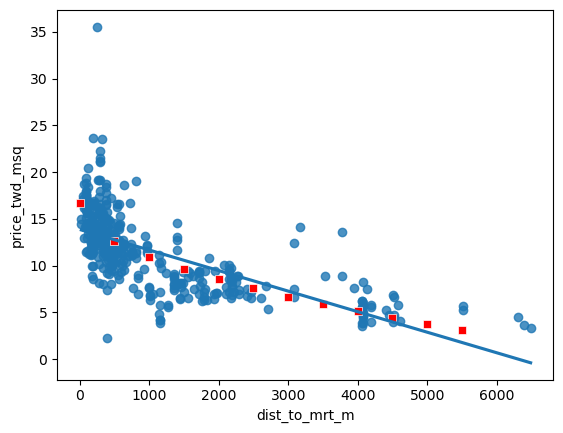

In [17]:
#Compara gráficamente (Regplot y scatterPlot) en los dos casos e interpreta
fig = plt.figure()
sns.regplot(x="dist_to_mrt_m" , y='price_twd_msq',ci=None, data=df_precioMetro)
sns.scatterplot(x="dist_to_mrt_m" , y='price_twd_msq', data=data_Range60000,color='red',marker='s')

plt.show()

## Validación del modelo

* Compara los coeficientes de determiniación. Compara también los MSE
* Observa gráficamente los residuos tanto para el precio vs n_convenience como para el distancia al metro
* Compara el QQplot del modelo (respecto distancia al metro) sin transformar y transformado 

In [18]:
mdl_dist = ols('price_twd_msq~dist_to_mrt_m', data=df_precioMetro).fit()
mdl_dist_org = ols('price_twd_msq~distanciaCuadrada', data=df_precioMetro).fit()

In [19]:
mdl_dist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.64e-56
Time:                        09:35:51   Log-Likelihood:                -1047.6
No. Observations:                 414   AIC:                             2099.
Df Residuals:                     412   BIC:                             2107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8734      0.197     70.258      0.000      13.485      14.262
dist_to_mrt_m    -0.0022      0.000    -18.500      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      140.820   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              988.283
Skew:                           1.263   Prob(JB):                    2.49e-215
Kurtosis:                      10.135   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
mdl_dist_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.55e-70
Time:                        09:36:13   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7098      0.278     60.163      0.000      16.164      17.256
distanciaCuadrada    -0.1828      0.008    -21.674      0.000      -0.199      -0.166
==============================================================================
Omnibus:                      169.655   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1645.827
Skew:                           1.470   Prob(JB):                         0.00
Kurtosis:                      12.315   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#residuo modelo 
print(mdl_dist.mse_resid)

#residuo original
print(mdl_dist_org.mse_resid)

9.280898491629117
7.938835523599512


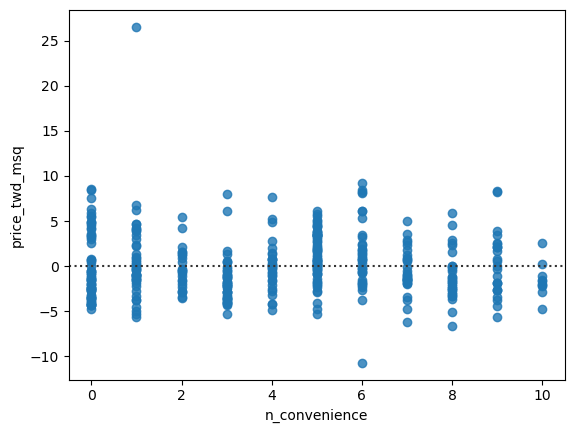

In [23]:
sns.residplot(x='n_convenience', y='price_twd_msq', data = df_precioMetro)
plt.show()

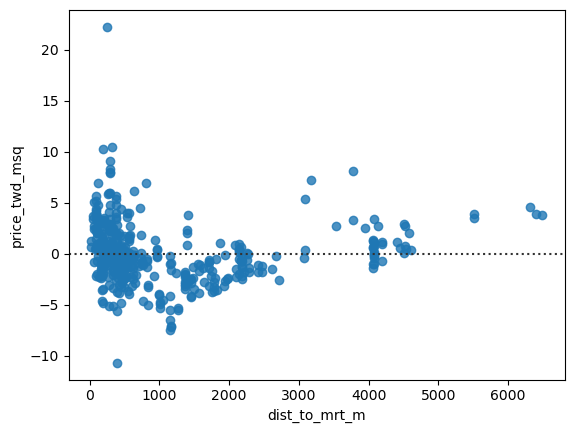

In [24]:
sns.residplot(x='dist_to_mrt_m', y='price_twd_msq', data = df_precioMetro)
plt.show()

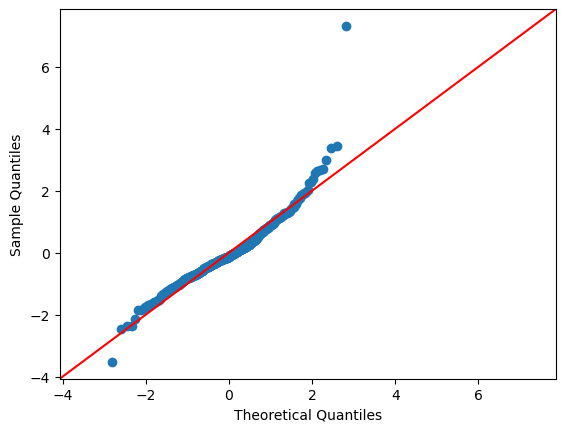

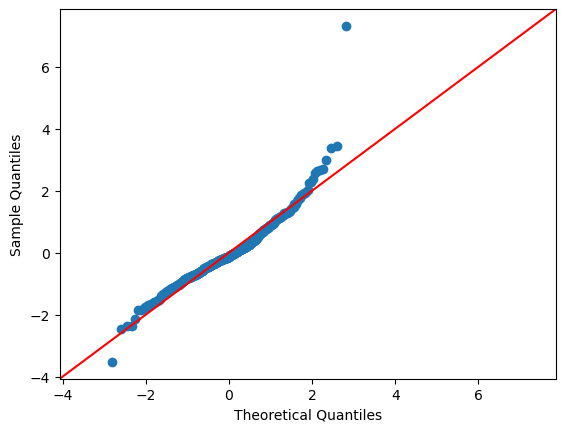

In [26]:
from statsmodels.api import qqplot
qqplot(data=mdl_dist.resid, fit=True,line='45')

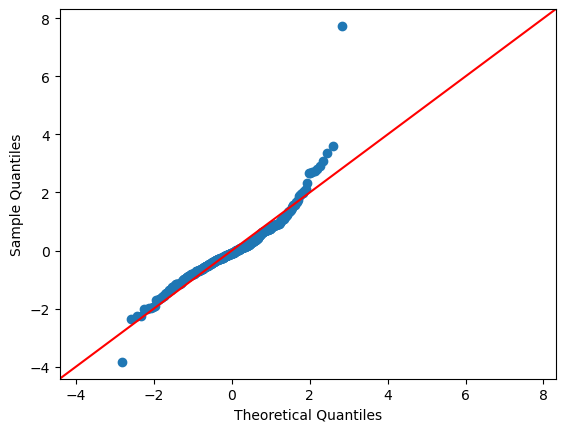

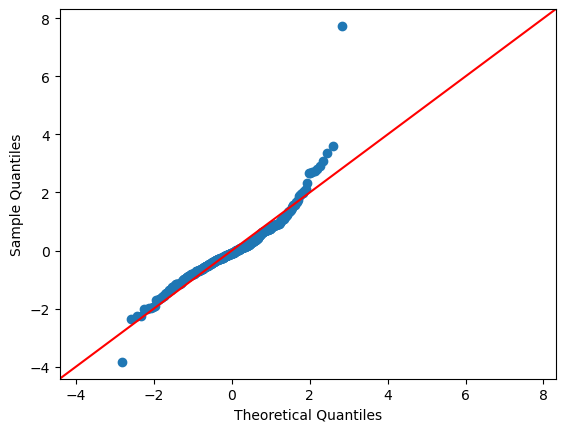

In [27]:
qqplot(data=mdl_dist_org.resid, fit=True,line='45')